In [25]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from sklearn.datasets import make_classification

np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

print(f'X: {X.shape}, Y: {Y.shape}')

X: (100, 2), Y: (100,)


0.0 1.0


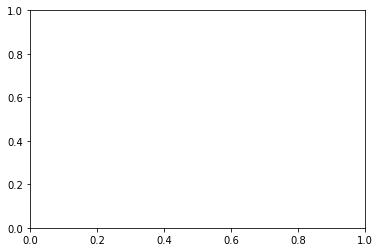

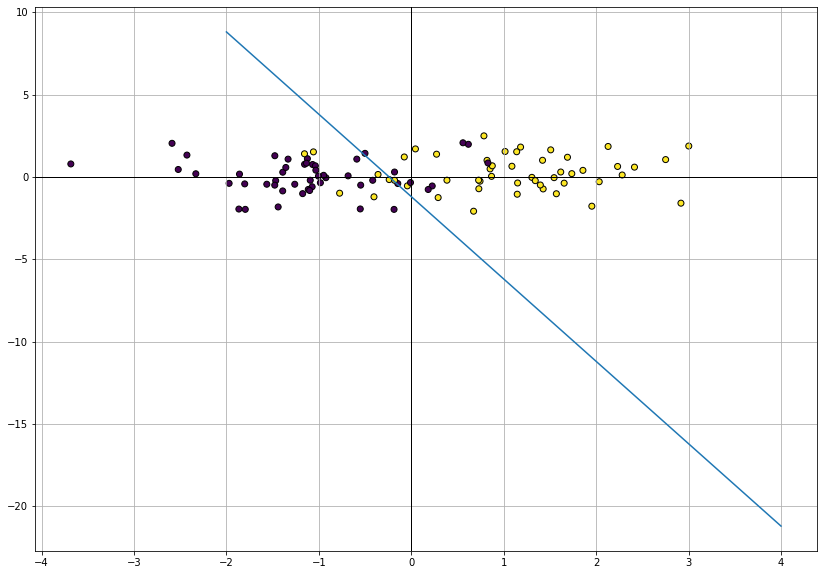

In [27]:
def plotmodel(w1, w2, b):
    
    
    
    x = np.linspace(-2, 4, 50)
    y = (-w1*x - b)/w2
    xmin, xmax = plt.gca().get_xlim()
    ymin, ymax = plt.gca().get_ylim()
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax) 
    print(ymin, ymax)
    
   
    plt.figure(figsize=(14,10))  #largura X altura
    
    plt.axvline(0, -1, 1, color = 'k', linewidth = 1)
    plt.axhline(0, -2, 4, color = 'k', linewidth = 1)
    
    plt.scatter(X[:,0], X[:,1], marker='o', c=Y, edgecolors='k',)
    plt.plot(x,y)

    plt.grid(True)
    
    
    
    
w1 = 5 #a
w2 = 1 #b
b = 1.2 #c
p=(1,-1)
plotmodel(w1, w2, b)

In [28]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

print(f'Pesos do perceptron: {perceptron.weight.data}')
print(f'Pesos do perceptron: {perceptron.bias.data}')

perceptron.weight = nn.Parameter(torch.Tensor([[w1,w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([[b]]))

print(f'Pesos do perceptron: {perceptron.weight.data}')
print(f'Pesos do perceptron: {perceptron.bias.data}')

Pesos do perceptron: tensor([[0.3898, 0.3906]])
Pesos do perceptron: tensor([0.3515])
Pesos do perceptron: tensor([[5., 1.]])
Pesos do perceptron: tensor([[1.2000]])


In [32]:
#activation = nn.Tanh()
activation = nn.ReLU()

0.0 1.0
k = 0 idx: 17 X[idx]: [-3.68350834  0.7847971 ]
k = 1 idx: 21 X[idx]: [-0.14610248 -0.40499557]
k = 2 idx: 43 X[idx]: [-0.50090083  1.42804287]
k = 3 idx: 66 X[idx]: [3.00199903 1.8727757 ]


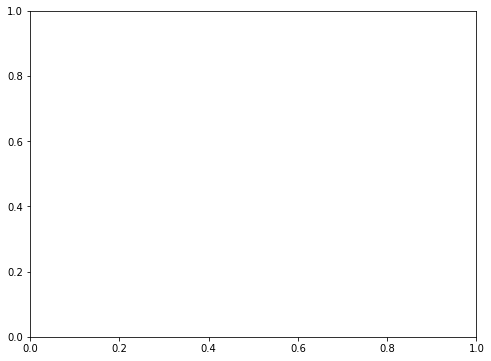

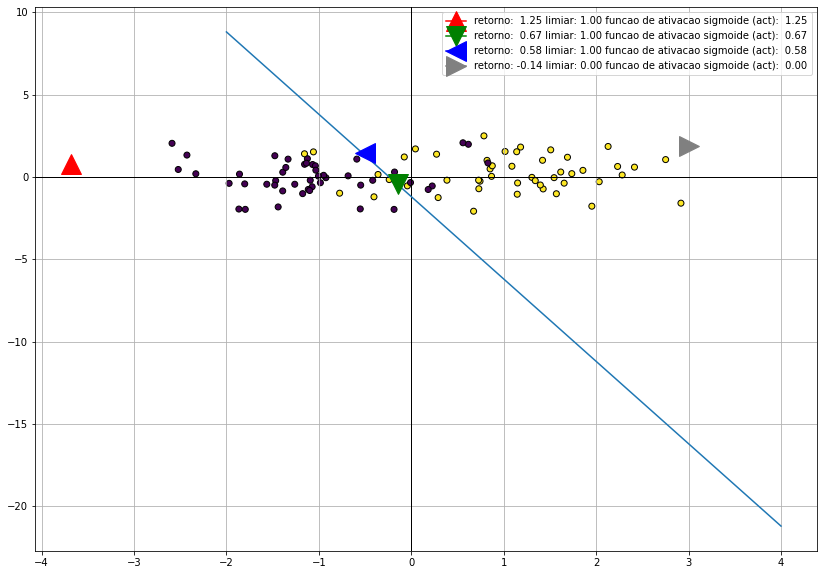

In [33]:
perceptron = nn.Linear(2, 1)
markers = ['^', 'v', '<', '>']
colors = ['r', 'g', 'b', 'gray' ]
plt.figure(figsize=(8,6))
plotmodel(w1, w2, b)

for k, idx in enumerate([17,21,43, 66]):
    x = torch.Tensor(X[idx])
    print(f'k = {k}' + f' idx: {idx}' + f' X[idx]: {X[idx]}')
    
    ret = perceptron(x)
    act = activation(ret)
    
    act_limiar = 0 if ret.data < 0 else 1
    
    label = f'retorno: {ret.data.numpy()[0]:5.2f}' + f' limiar: {act_limiar:4.2f}' + f' funcao de ativacao sigmoide (act): {act.data.numpy()[0]:5.2f}'
    
    
    plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=20, label=label)

plt.legend()
plt.show()